In [4]:
from PIL import Image
from PIL import ImageStat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop

Using TensorFlow backend.


In [40]:

image = Image.open('image.jpg')
stat = ImageStat.Stat(image)
stat.mean[0]

88.94506977944533

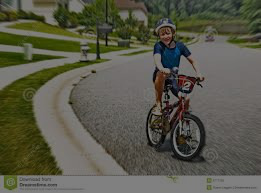

In [11]:
image

In [42]:
image = Image.open('image1.jpg')
stat = ImageStat.Stat(image)
stat.mean[0]

167.9634923470907

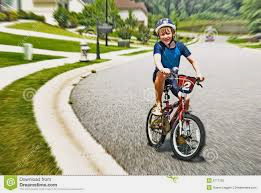

In [43]:
image

In [44]:
image = Image.open('image2.jpg')
stat = ImageStat.Stat(image)
stat.mean[0]

203.61179600182638

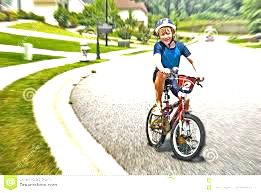

In [45]:
image

In [58]:
image = Image.open('image3.jpg').convert('L')
stat = ImageStat.Stat(image)
stat.mean

[217.78704861731484]

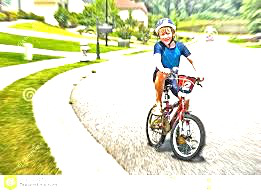

In [47]:
image

256


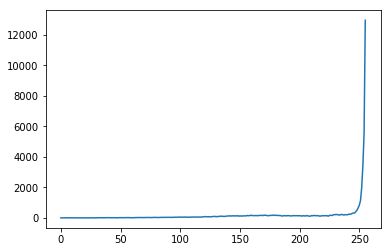

In [57]:
import matplotlib.pyplot as plt
image = Image.open('image3.jpg').convert('L')
histogram = image.histogram()
print(len(histogram))
plt.plot(histogram)

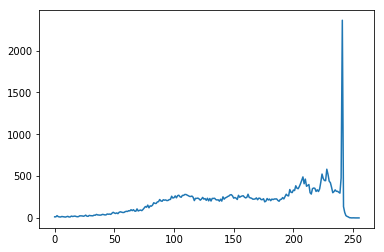

In [30]:
image = Image.open('image1.jpg').convert('L')
histogram = image.histogram()
plt.plot(histogram)

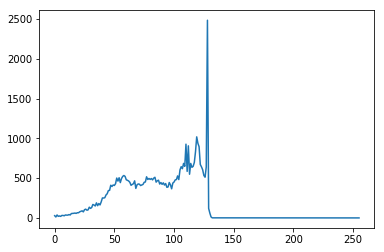

In [31]:
import matplotlib.pyplot as plt
image = Image.open('image.jpg').convert('L')
histogram = image.histogram()
plt.plot(histogram)

In [32]:
brightness= len(histogram)
brightness

256

In [60]:
np.linspace(10,256, 11)

array([ 10. ,  34.6,  59.2,  83.8, 108.4, 133. , 157.6, 182.2, 206.8,
       231.4, 256. ])

In [0]:
labels=[]
#Images is the list of images 
for image in Images:
  image = Image.open(image).convert('L')
  stat = (ImageStat.Stat(image)).mean
  
  if stat < 10:
    labels.append(0)
  elif stat < 34:
    labels.append(1)
  elif stat < 59:
    labels.append(2)
  elif stat < 83:
    labels.append(3)
  elif stat < 108:
    labels.append(4)
  elif stat < 133:
    labels.append(5)
  elif stat < 157:
    labels.append(6)
  elif stat < 182:
    labels.append(7)
  elif stat < 206:
    labels.append(8)
  elif stat < 231:
    labels.append(9)
  else:
    labels.append(10)

#### MODEL 2:

In [2]:
!wget http://download.tensorflow.org/example_images/flower_photos.tgz

--2019-09-15 10:37:16--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.167.128, 2a00:1450:400c:c0a::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.167.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   170MB/s    in 1.3s    

2019-09-15 10:37:19 (170 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [0]:
!tar -xzf flower_photos.tgz

In [0]:
import os
train_images = ['/content/flower_photos/daisy/{}'.format(i) for i in os.listdir('/content/flower_photos/daisy')]

In [0]:
train_images

In [0]:
X=[]  
y=[]  
for image in train_images:
  X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(150,150),interpolation=cv2.INTER_CUBIC))
  image = Image.open(image).convert('L')
  stat = ImageStat.Stat(image)
  y.extend(stat.mean)

In [6]:
len(X),len(y)

(633, 633)

Training the data from the set of 633 images

In [7]:
max(y),min(y)

(236.66124324324323, 14.765801801801802)

Normalizing the Brightness level

In [0]:
import numpy as np
mm = MinMaxScaler()
y_new=mm.fit_transform(np.array(y).reshape(-1,1))


In [0]:
z=y_new.ravel()
z=z*10

In [10]:
max(z),min(z)

(10.000000000000002, 0.0)

In [0]:
z=z.round()

In [43]:
max(z),min(z)

(10.0, 0.0)

Text(0.5, 1.0, 'Labels')

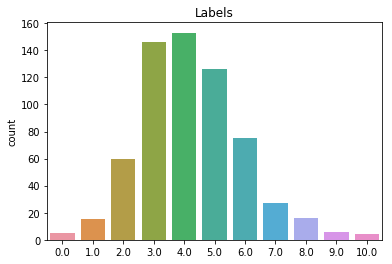

In [44]:
sns.countplot(z)
plt.title('Labels')

In [14]:
type(X)

(633, 150, 150, 3)

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dense(10,activation='softmax'))
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 645248)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               330367488 

In [0]:
from keras.utils import to_categorical
Z= to_categorical(z)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop,metrics=['acc'])

In [0]:
train_generator = ImageDataGenerator(rescale=1./255,  
                                rotation_range=20,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                zoom_range=0.2,
                                horizontal_flip=True)

val_generator = ImageDataGenerator(rescale=1./255)

In [50]:
X_train,X_val,y_train,y_val=train_test_split(np.array(X),z,test_size=0.2)
X_train.shape,X_val.shape,y_train.shape

((506, 150, 150, 3), (127, 150, 150, 3), (506,))

In [61]:
model.fit_generator(train_generator.flow(X_train,y_train,batch_size=32),steps_per_epoch=300,epochs=5,
                    validation_data=val_generator.flow(X_val,y_val,batch_size=32),validation_steps=100)

Epoch 1/5
300/300 [==============================] - 54s 180ms/step - loss: 0.5782 - acc: 0.7664 - val_loss: 1.0585 - val_acc: 0.5748
Epoch 2/5
300/300 [==============================] - 53s 176ms/step - loss: 0.5794 - acc: 0.7600 - val_loss: 1.0458 - val_acc: 0.6220
Epoch 3/5
300/300 [==============================] - 53s 176ms/step - loss: 0.5543 - acc: 0.7814 - val_loss: 1.2690 - val_acc: 0.4252
Epoch 4/5
300/300 [==============================] - 52s 174ms/step - loss: 0.5505 - acc: 0.7790 - val_loss: 1.1864 - val_acc: 0.5906
Epoch 5/5
300/300 [==============================] - 52s 172ms/step - loss: 0.5339 - acc: 0.7891 - val_loss: 1.2884 - val_acc: 0.5276


In [0]:
predicted_prob=model.predict(X_val)
labels=[]
for i in (predicted_prob):
  labels.append(np.argmax(i))
  